## Performing Standard Scaling by Hand

In [80]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("iris.csv")
calc_df = df[['SepalLengthCm']]
calc_df

,SepalLengthCm
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0
...,...
145,6.7
146,6.3
147,6.5
148,6.2


In [82]:
# Calculate the mean (average of the column):
SepalLengthCm_mean = calc_df['SepalLengthCm'].mean()
print("The average of our columns is:",SepalLengthCm_mean)

# Calculate the squared difference from the mean:
calc_df['SepalLengthCm_diff_from_mean'] = calc_df['SepalLengthCm']-SepalLengthCm_mean
# and square that:
calc_df['SepalLengthCm_diff_from_mean_squared'] = calc_df['SepalLengthCm_diff_from_mean'] **2

# Add up all the squared differences:
sum_of_squared_differences = calc_df["SepalLengthCm_diff_from_mean_squared"].sum()
print("The sum of all the differences in the column is now:", sum_of_squared_differences)

# Calculate variance for the column:
SepalLengthCm_variance = sum_of_squared_differences / (len(calc_df['SepalLengthCm']))
print("\nWe calculate a variance for the column to be:\n", SepalLengthCm_variance)

# Finally, calculate the Standard Deviation (sqrt of the Variance):
SepalLengthCm_std = np.sqrt(SepalLengthCm_variance)
print("\nWe calculate a Standard Deviation for the column to be:\n", SepalLengthCm_std)

The average of our columns is: 5.843333333333334
The sum of all the differences in the column is now: 102.16833333333335

We calculate a variance for the column to be:
 0.6811222222222223

We calculate a Standard Deviation for the column to be:
 0.8253012917851409


In [84]:
# Therefore, to get the final Scaled value:
# subtract the mean from the actual value and divide by the Std :
calc_df['SepalLengthCm_scaled'] = (calc_df['SepalLengthCm'] - SepalLengthCm_mean ) / SepalLengthCm_std
display(calc_df)

,SepalLengthCm,SepalLengthCm_diff_from_mean,SepalLengthCm_diff_from_mean_squared,SepalLengthCm_scaled
0,5.1,-0.743333,0.552544,-0.900681
1,4.9,-0.943333,0.889878,-1.143017
2,4.7,-1.143333,1.307211,-1.385353
3,4.6,-1.243333,1.545878,-1.506521
4,5.0,-0.843333,0.711211,-1.021849
...,...,...,...,...
145,6.7,0.856667,0.733878,1.038005
146,6.3,0.456667,0.208544,0.553333
147,6.5,0.656667,0.431211,0.795669
148,6.2,0.356667,0.127211,0.432165


## Let's Check!

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

calc_df[["SepalLengthCm_SS"]] = scaler.fit_transform(calc_df[["SepalLengthCm"]])
display(calc_df)

print("Variance:", calc_df["SepalLengthCm"].var(), calc_df["SepalLengthCm_SS"].var())

,SepalLengthCm,SepalLengthCm_diff_from_mean,SepalLengthCm_diff_from_mean_squared,SepalLengthCm_scaled,SepalLengthCm_SS
0,5.1,-0.743333,0.552544,-0.900681,-0.900681
1,4.9,-0.943333,0.889878,-1.143017,-1.143017
2,4.7,-1.143333,1.307211,-1.385353,-1.385353
3,4.6,-1.243333,1.545878,-1.506521,-1.506521
4,5.0,-0.843333,0.711211,-1.021849,-1.021849
...,...,...,...,...,...
145,6.7,0.856667,0.733878,1.038005,1.038005
146,6.3,0.456667,0.208544,0.553333,0.553333
147,6.5,0.656667,0.431211,0.795669,0.795669
148,6.2,0.356667,0.127211,0.432165,0.432165


Variance: 0.6856935123042505 1.006711409395973


## Let's visualize the transformation using Seaborn:

<Axes: xlabel='SepalLengthCm_scaled', ylabel='Density'>

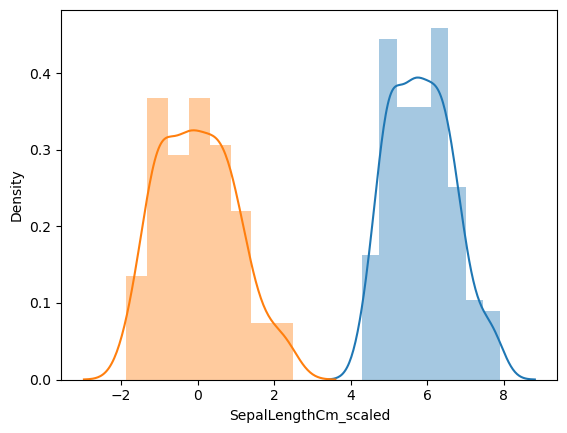

In [88]:
import seaborn as sn
sn.distplot(calc_df["SepalLengthCm"])
sn.distplot(calc_df['SepalLengthCm_scaled'])

The original data, in blue, is centered on 6, once scaled, it is centered on 0. The shape of the curve also looks a little different as we've forced varience to 1.